In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [210]:
t20_score = pd.read_csv('/content/drive/MyDrive/Datasets/t20_cricket_match_score_prediction.csv')
t20_score

,Match ID,Overs Played,Wickets Lost,Run Rate,Home/Away,Opponent Strength,Pitch Condition,Weather,Predicted Score
0,1,7,1,11.04,Away,3,Bowling,Sunny,82
1,2,20,10,11.87,Home,5,Bowling,Sunny,204
2,3,15,7,6.14,Home,7,Balanced,Sunny,105
3,4,11,8,8.84,Home,9,Batting,Cloudy,121
4,5,8,0,9.56,Home,2,Balanced,Sunny,104
...,...,...,...,...,...,...,...,...,...
1495,1496,15,8,9.82,Home,3,Bowling,Overcast,113
1496,1497,2,10,13.41,Home,9,Balanced,Sunny,29
1497,1498,3,6,7.21,Home,1,Batting,Overcast,40
1498,1499,17,6,8.81,Away,5,Bowling,Overcast,116


In [211]:
#shape
t20_score.shape

(1500, 9)

In [212]:
#info
t20_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Match ID           1500 non-null   int64  
 1   Overs Played       1500 non-null   int64  
 2   Wickets Lost       1500 non-null   int64  
 3   Run Rate           1500 non-null   float64
 4   Home/Away          1500 non-null   object 
 5   Opponent Strength  1500 non-null   int64  
 6   Pitch Condition    1500 non-null   object 
 7   Weather            1500 non-null   object 
 8   Predicted Score    1500 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 105.6+ KB


In [213]:
#counting null values
t20_score.isnull().sum()

,0
Match ID,0
Overs Played,0
Wickets Lost,0
Run Rate,0
Home/Away,0
Opponent Strength,0
Pitch Condition,0
Weather,0
Predicted Score,0


In [214]:
#Duplicate values
t20_score.duplicated().sum()

np.int64(0)

In [215]:
for i in t20_score.select_dtypes(include="object").columns:
  print(t20_score[i].value_counts())
  print("***"*10)

Home/Away
Home    752
Away    748
Name: count, dtype: int64
******************************
Pitch Condition
Bowling     524
Balanced    492
Batting     484
Name: count, dtype: int64
******************************
Weather
Sunny       551
Overcast    476
Cloudy      473
Name: count, dtype: int64
******************************


In [216]:
##Selecting numerical features
numerical_data = t20_score.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 6 numerical features: 

['Match ID', 'Overs Played', 'Wickets Lost', 'Run Rate', 'Opponent Strength', 'Predicted Score']


In [217]:
#Selecting categoricalfeatures
categorical_data=t20_score.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 3 categorical features: 

['Home/Away', 'Pitch Condition', 'Weather']


In [218]:
#Describe statistics
t20_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Match ID,1500.0,750.500000,433.157015,1.0,375.7500,750.500,1125.25,1500.0
Overs Played,1500.0,10.255333,5.864219,1.0,5.0000,10.000,15.00,20.0
Wickets Lost,1500.0,4.894000,3.078487,0.0,2.0000,5.000,8.00,10.0
Run Rate,1500.0,9.964173,2.880189,5.0,7.5075,9.915,12.48,15.0
Opponent Strength,1500.0,5.499333,2.891293,1.0,3.0000,6.000,8.00,10.0
Predicted Score,1500.0,112.637333,71.886356,6.0,56.0000,97.000,157.00,382.0


In [219]:
t20_score.describe(include="object").T

,count,unique,top,freq
Home/Away,1500,2,Home,752
Pitch Condition,1500,3,Bowling,524
Weather,1500,3,Sunny,551


In [220]:
non_numeric_cols = t20_score.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Home/Away', 'Pitch Condition', 'Weather'], dtype='object')


In [221]:
t20_score.drop(columns=["Match ID"], inplace=True)

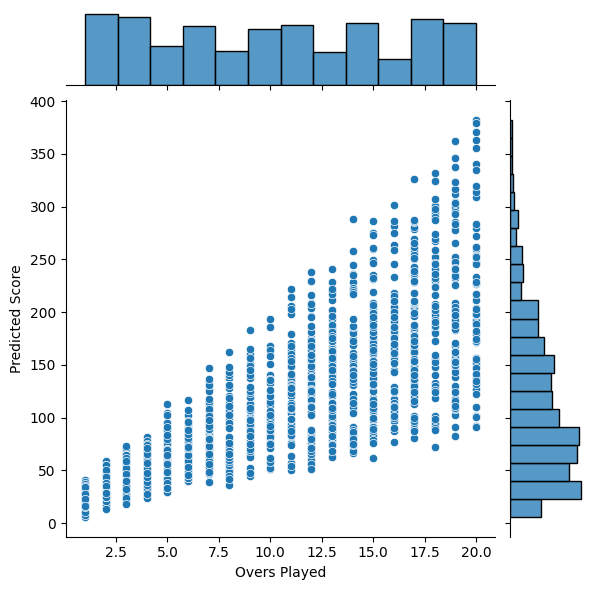

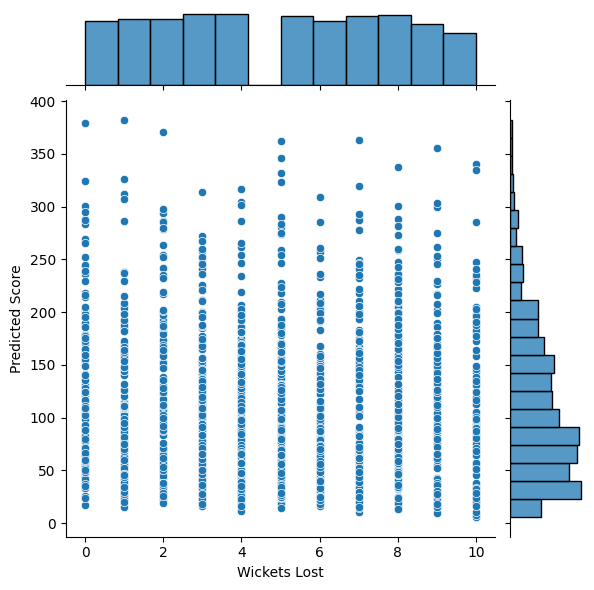

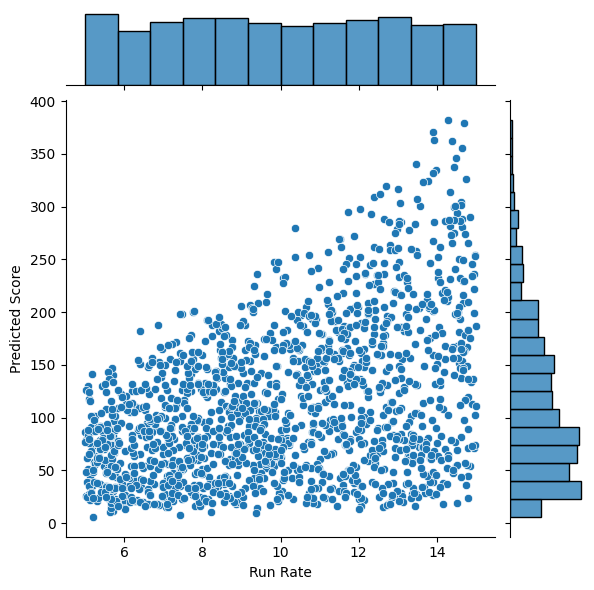

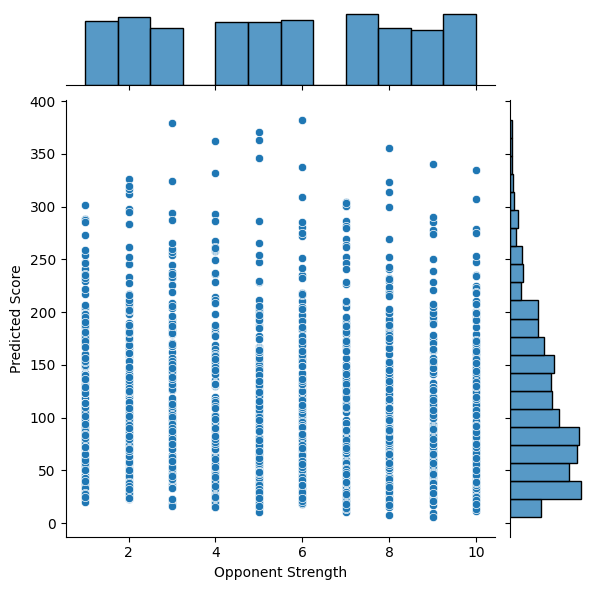

In [222]:
# jointplot plot to understand relation between the data

for i in ['Overs Played', 'Wickets Lost', 'Run Rate', 'Opponent Strength']:
       sns.jointplot(data=t20_score, x=i , y="Predicted Score")
       plt.show()

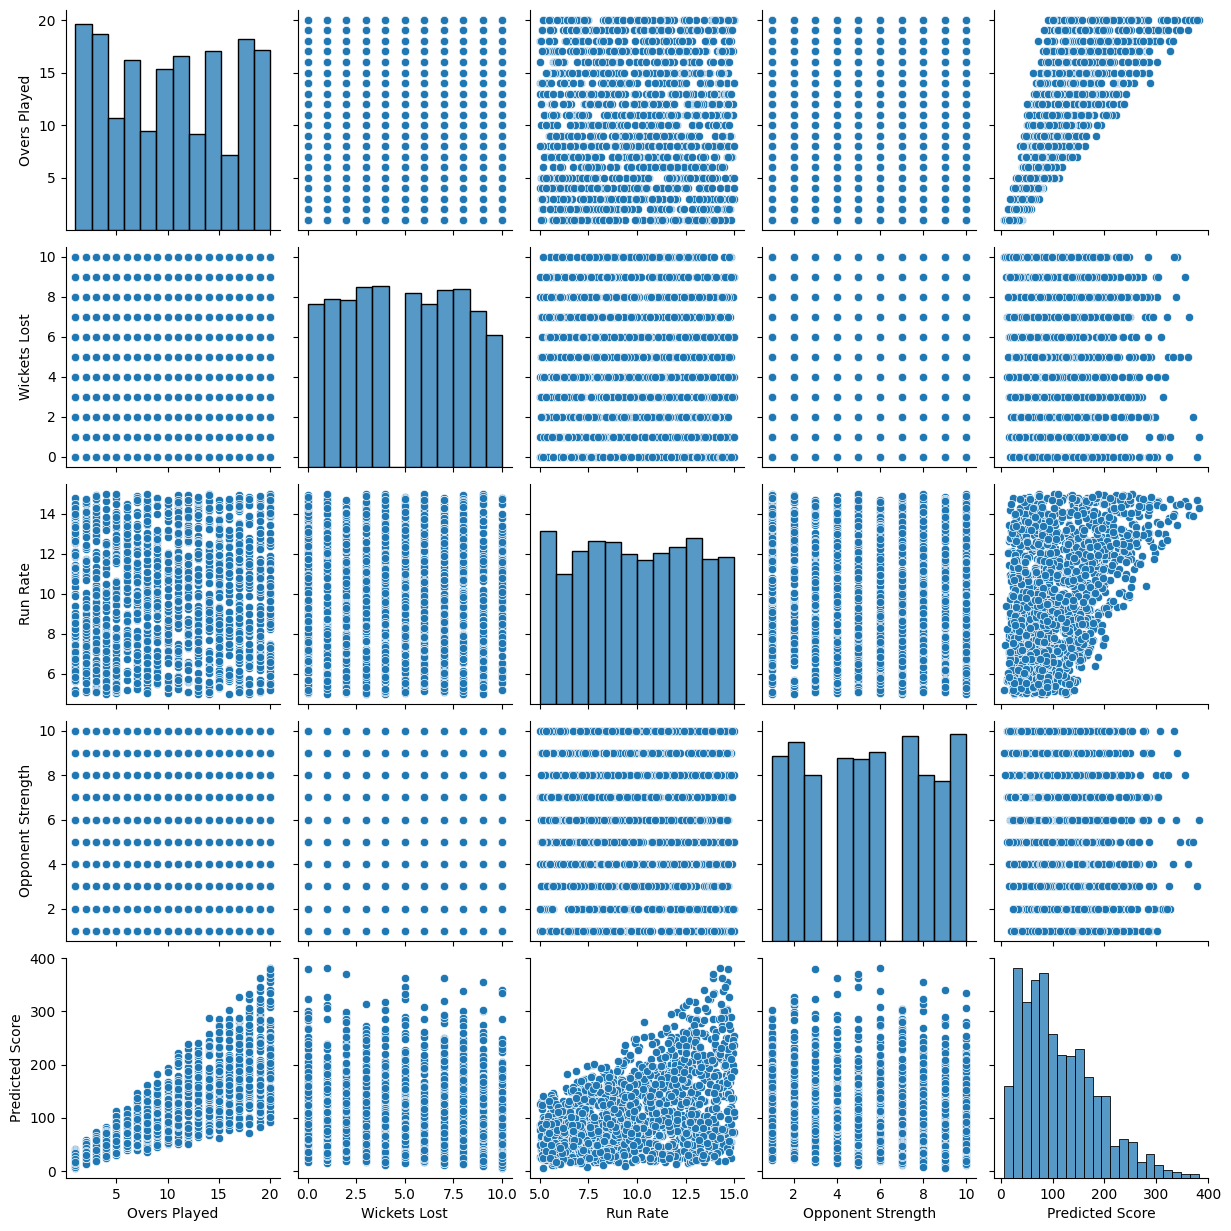

In [223]:
sns.pairplot(t20_score)

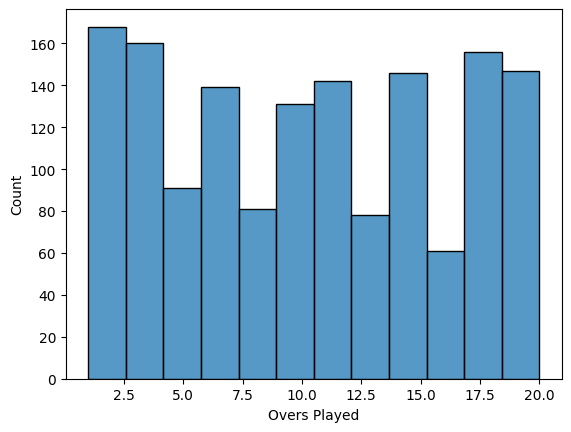

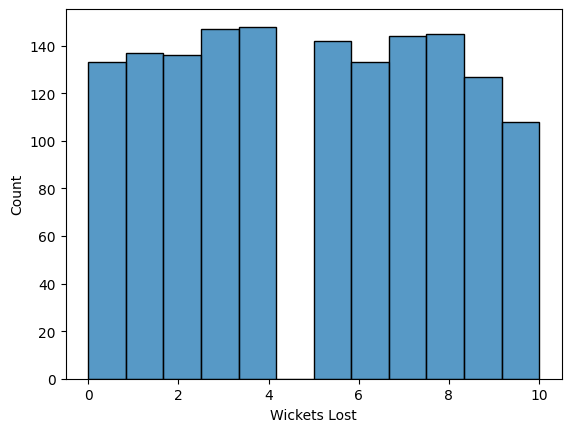

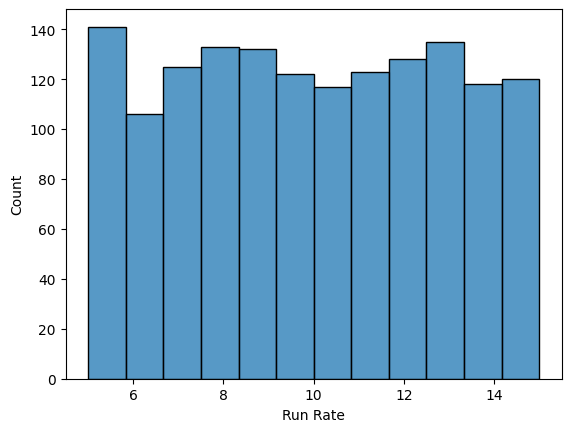

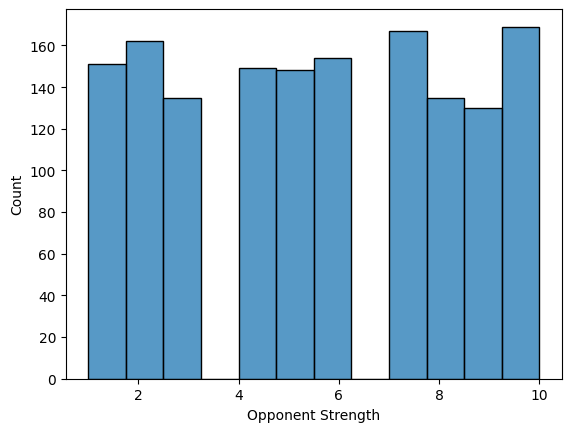

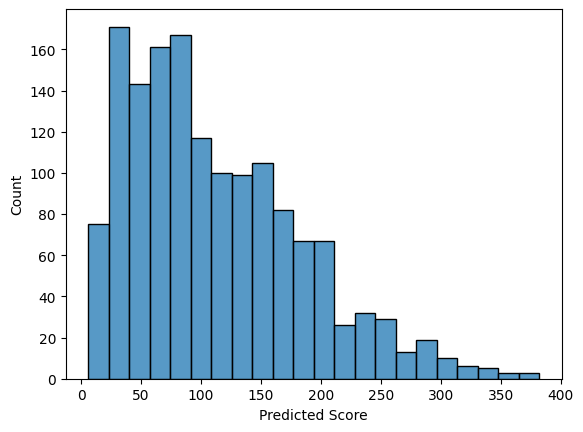

In [224]:
#histogram to understand the distribution
for i in t20_score.select_dtypes(include="number").columns:
  sns.histplot(data=t20_score, x=i)
  plt.show()

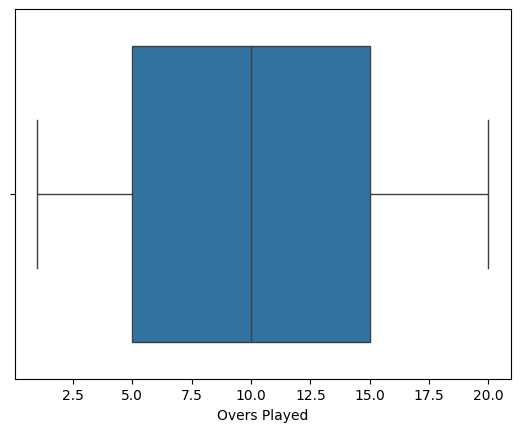

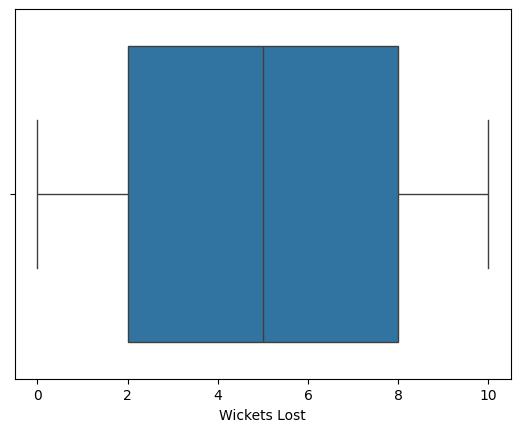

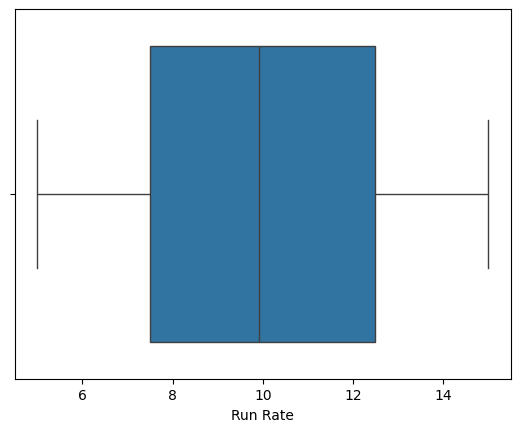

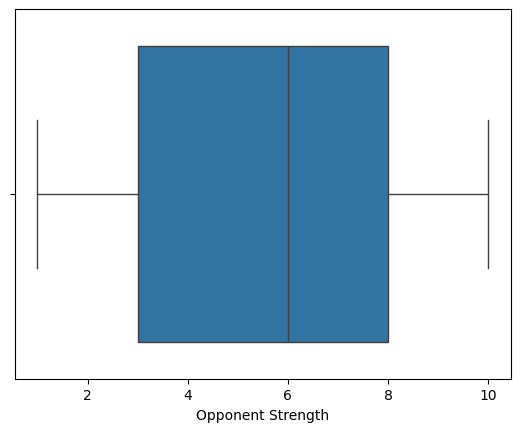

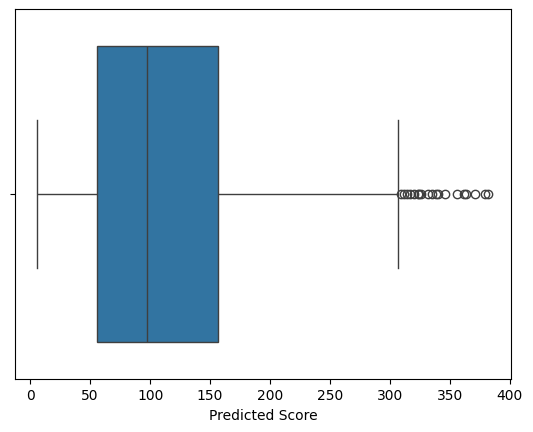

In [225]:
#boxplot to identify outliers
for i in t20_score.select_dtypes(include="number").columns:
  sns.boxplot(data=t20_score, x=i)
  plt.show()

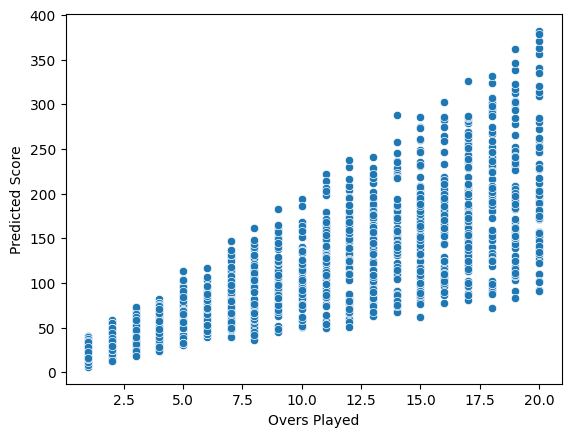

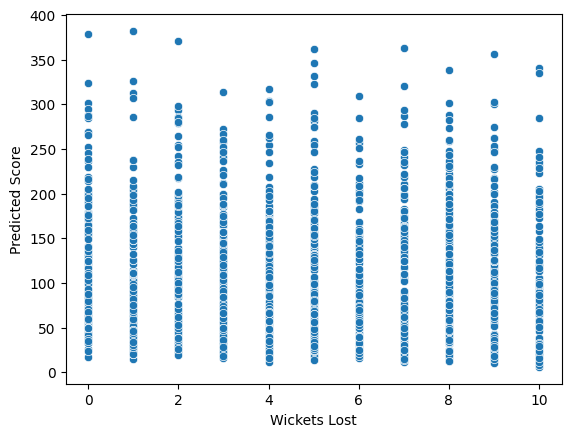

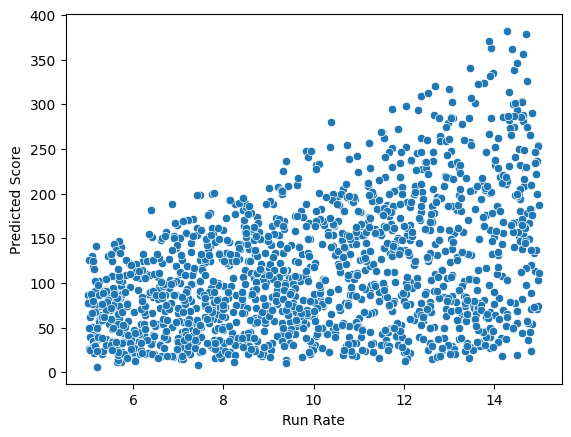

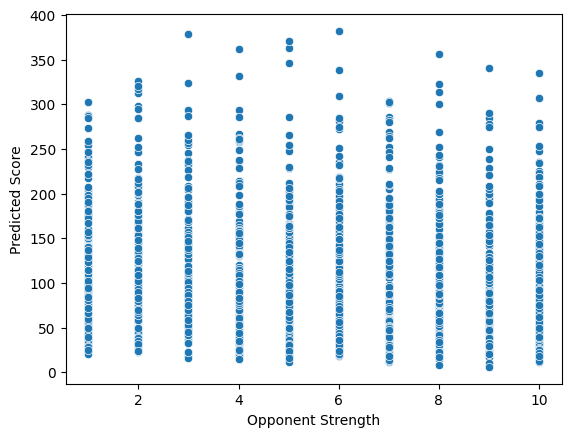

In [226]:
# scatter plot to understand relation between the data

for i in ['Overs Played', 'Wickets Lost', 'Run Rate', 'Opponent Strength']:
  sns.scatterplot(data= t20_score, x=i , y="Predicted Score")
  plt.show()

In [227]:
from sklearn.preprocessing import LabelEncoder

for col in non_numeric_cols:
  le = LabelEncoder()
  t20_score[col] = le.fit_transform(t20_score[col])
t20_score

#Away=0, Home=1
#Balanced=0, Batting=1, Bowling=2
#Cloudy=0, Overcast=1, Sunny=2

,Overs Played,Wickets Lost,Run Rate,Home/Away,Opponent Strength,Pitch Condition,Weather,Predicted Score
0,7,1,11.04,0,3,2,2,82
1,20,10,11.87,1,5,2,2,204
2,15,7,6.14,1,7,0,2,105
3,11,8,8.84,1,9,1,0,121
4,8,0,9.56,1,2,0,2,104
...,...,...,...,...,...,...,...,...
1495,15,8,9.82,1,3,2,1,113
1496,2,10,13.41,1,9,0,2,29
1497,3,6,7.21,1,1,1,1,40
1498,17,6,8.81,0,5,2,1,116


In [228]:
# Calculate the correlation matrix
correlation_matrix = t20_score.corr()
correlation_matrix


,Overs Played,Wickets Lost,Run Rate,Home/Away,Opponent Strength,Pitch Condition,Weather,Predicted Score
Overs Played,1.000000,0.019053,0.007441,0.032067,-0.013387,-0.012602,-0.021089,0.810570
Wickets Lost,0.019053,1.000000,0.007372,0.017639,0.001229,-0.006743,0.033697,-0.039830
Run Rate,0.007441,0.007372,1.000000,0.071358,-0.061225,-0.009879,-0.003205,0.427099
Home/Away,0.032067,0.017639,0.071358,1.000000,-0.053281,0.003172,0.019235,0.067179
Opponent Strength,-0.013387,0.001229,-0.061225,-0.053281,1.000000,0.012902,0.010924,-0.076674
Pitch Condition,-0.012602,-0.006743,-0.009879,0.003172,0.012902,1.000000,-0.017358,-0.134729
Weather,-0.021089,0.033697,-0.003205,0.019235,0.010924,-0.017358,1.000000,-0.012113
Predicted Score,0.810570,-0.039830,0.427099,0.067179,-0.076674,-0.134729,-0.012113,1.000000


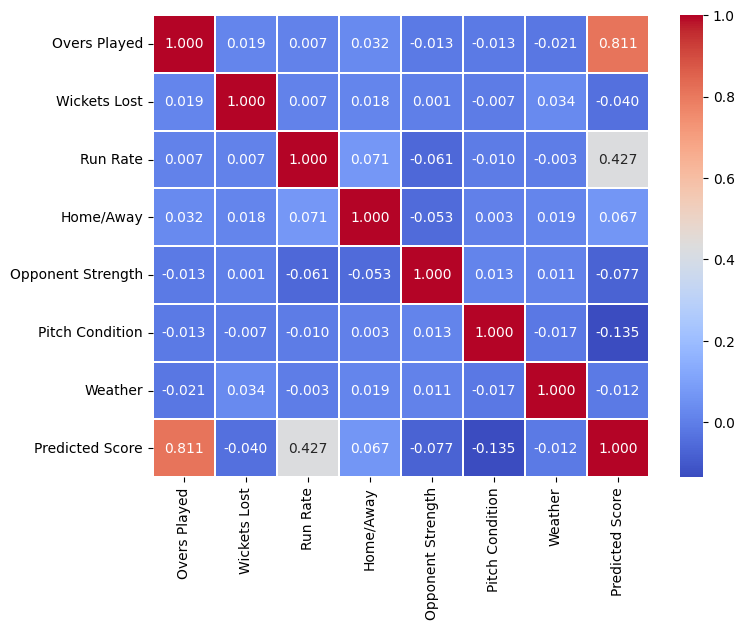

In [229]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

## **LINEAR REGRESSION MODEL**

In [230]:
from sklearn.model_selection import train_test_split
x = t20_score.drop(columns=['Predicted Score'])
y = t20_score['Predicted Score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .3, random_state = 42)

In [231]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1050, 7)
(450, 7)
(1050,)
(450,)


In [232]:
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

In [233]:
print("--- Linear Regression ---")
lr_model = LinearRegression()
lr_model.fit(xTrain_scaled, yTrain)
yPrediction_lr = lr_model.predict(xTest_scaled)
#yPrediction_lr

--- Linear Regression ---


In [234]:
lr_model.coef_

array([57.81046328, -4.84092507, 29.96698289,  0.32121777, -3.21813888,
       -8.79466177,  0.5504793 ])

MAE : 22.466432584412882
MSE : 798.042378226782
RMSE : 28.249643860176043
R-squared : 0.8435441294615332


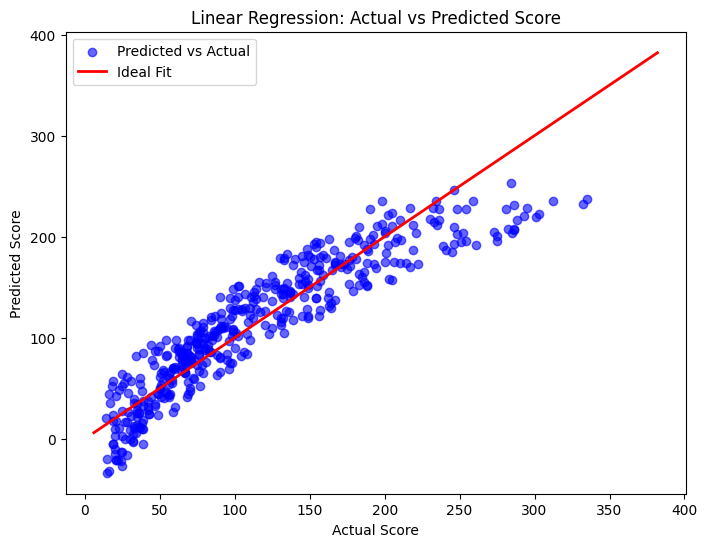

In [235]:
metrics_lr = {
    'MAE': mean_absolute_error(yTest, yPrediction_lr),
    'MSE': mean_squared_error(yTest, yPrediction_lr),
    'RMSE': np.sqrt(mean_squared_error(yTest, yPrediction_lr)),
    'R-squared': r2_score(yTest, yPrediction_lr)
}

for metric, value in metrics_lr.items():
    print(f'{metric} : {value}')

plt.figure(figsize=(8, 6))
plt.scatter(yTest, yPrediction_lr, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Linear Regression: Actual vs Predicted Score')
plt.legend()
plt.show()
plt.show()

<ipython-input-236-89b3c6786b80>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yTest - yPrediction_lr)


<Axes: xlabel='Predicted Score', ylabel='Density'>

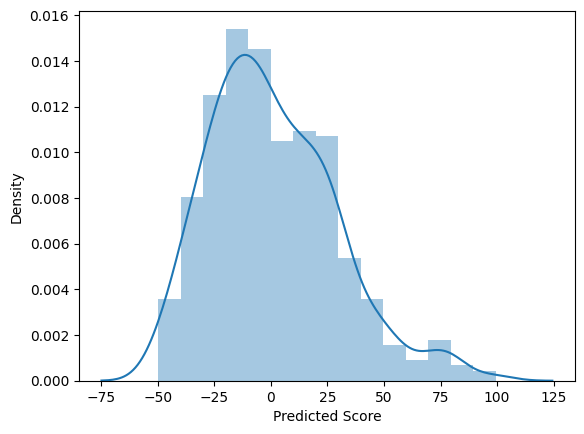

In [236]:
# sns.distplot(y_test - predictions,bins=50)
sns.distplot(yTest - yPrediction_lr)

In [237]:
coeffecients = pd.DataFrame(lr_model.coef_,x.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Overs Played,57.810463
Wickets Lost,-4.840925
Run Rate,29.966983
Home/Away,0.321218
Opponent Strength,-3.218139
Pitch Condition,-8.794662
Weather,0.550479


# **DECISION TREE**

In [238]:
print("\n--- Decision Tree ---")
dt_model = DecisionTreeRegressor(random_state=42) # Added random_state for reproducibility
dt_model.fit(xTrain_scaled, yTrain)
y_pred_dt = dt_model.predict(xTest_scaled)


--- Decision Tree ---


In [239]:
metrics_dt = {
    'MAE': mean_absolute_error(yTest, y_pred_dt),
    'MSE': mean_squared_error(yTest, y_pred_dt),
    'RMSE': np.sqrt(mean_squared_error(yTest, y_pred_dt)),
    'R-squared': r2_score(yTest, y_pred_dt)
}

for metric, value in metrics_dt.items():
    print(f'{metric} : {value}')

MAE : 11.71111111111111
MSE : 269.6355555555556
RMSE : 16.42058328913914
R-squared : 0.9471380634368023


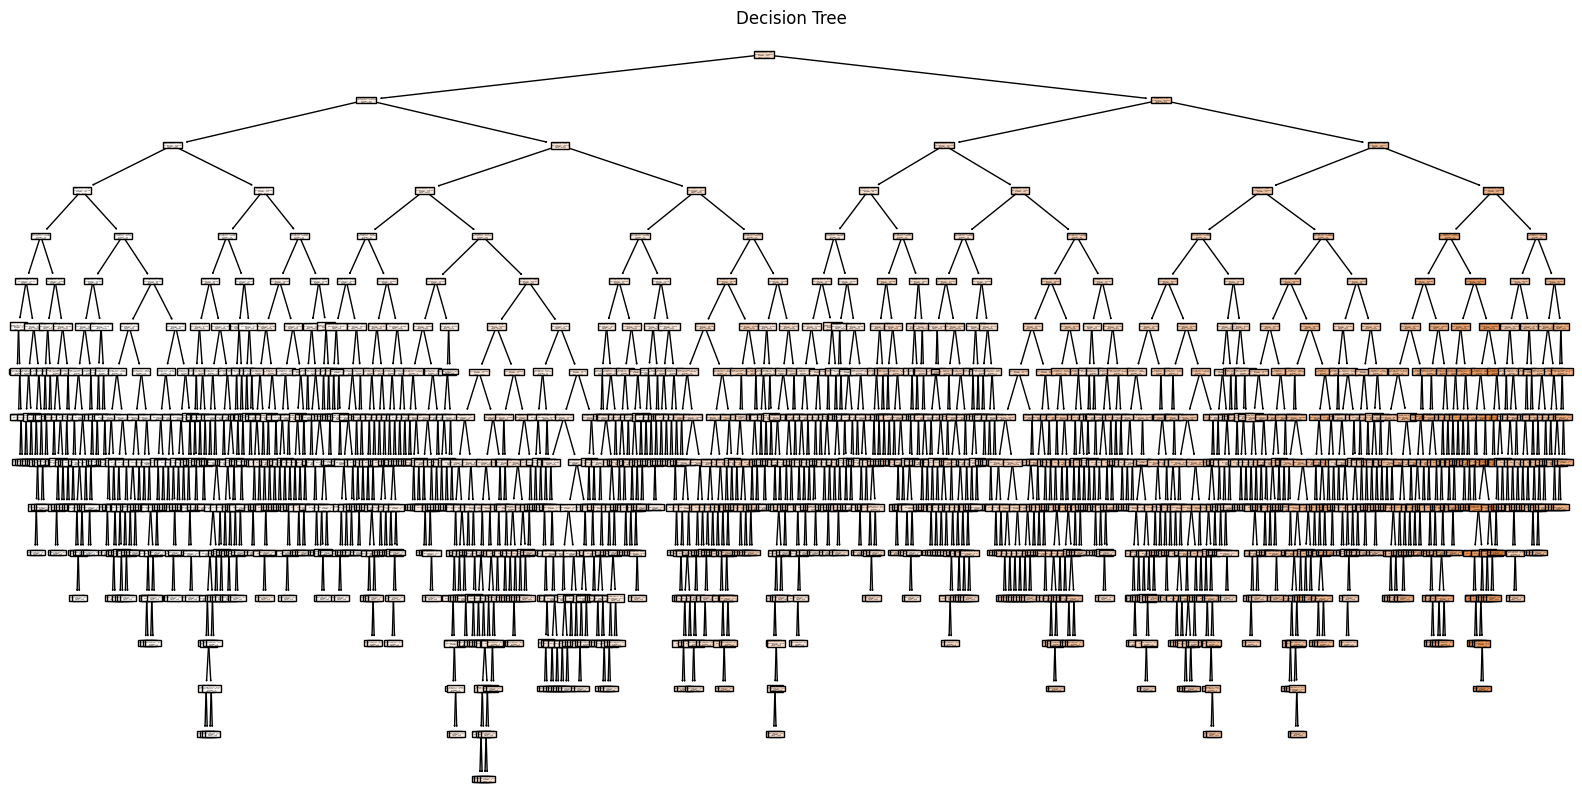

In [240]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=t20_score.columns, filled=True)
plt.title("Decision Tree")
plt.show()

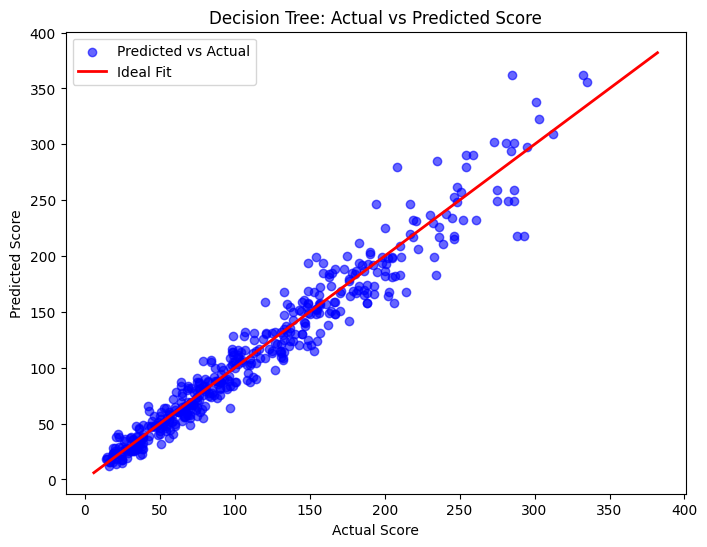

In [241]:
plt.figure(figsize=(8, 6))
plt.scatter(yTest, y_pred_dt, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Decision Tree: Actual vs Predicted Score')
plt.legend()
plt.show()

# **NEURAL NETWORKS**

In [242]:
print("\n--- Neural Network ---")
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(xTrain_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = nn_model.fit(xTrain_scaled, np.array(yTrain), epochs=200, validation_split=0.2, verbose=0)

loss, mae = nn_model.evaluate(xTest_scaled, np.array(yTest), verbose=0)

y_pred_nn = nn_model.predict(xTest_scaled).flatten()

metrics_nn = {
    'MAE': mae,
    'MSE': mean_squared_error(yTest, y_pred_nn),
    'RMSE': np.sqrt(mean_squared_error(yTest, y_pred_nn)),
    'R-squared': r2_score(yTest, y_pred_nn)
}

for metric, value in metrics_nn.items():
    print(f'{metric} : {value}')


--- Neural Network ---


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MAE : 2.898503303527832
MSE : 15.979104995727539
RMSE : 3.9973872711719514
R-squared : 0.996867299079895


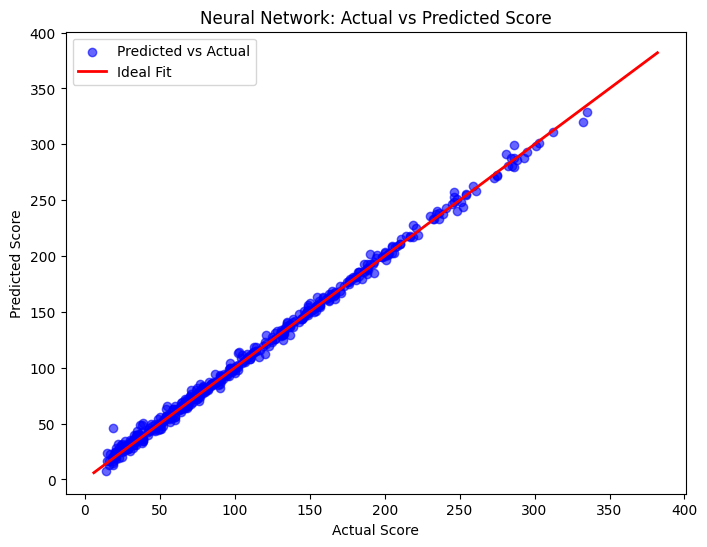

In [243]:
plt.figure(figsize=(8, 6))
plt.scatter(yTest, y_pred_nn, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Neural Network: Actual vs Predicted Score')
plt.legend()
plt.show()

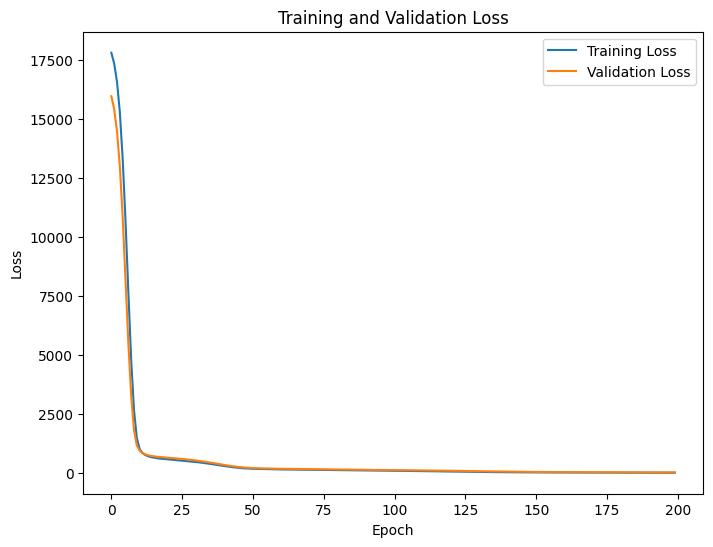

In [244]:
# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


--- Model Comparison ---


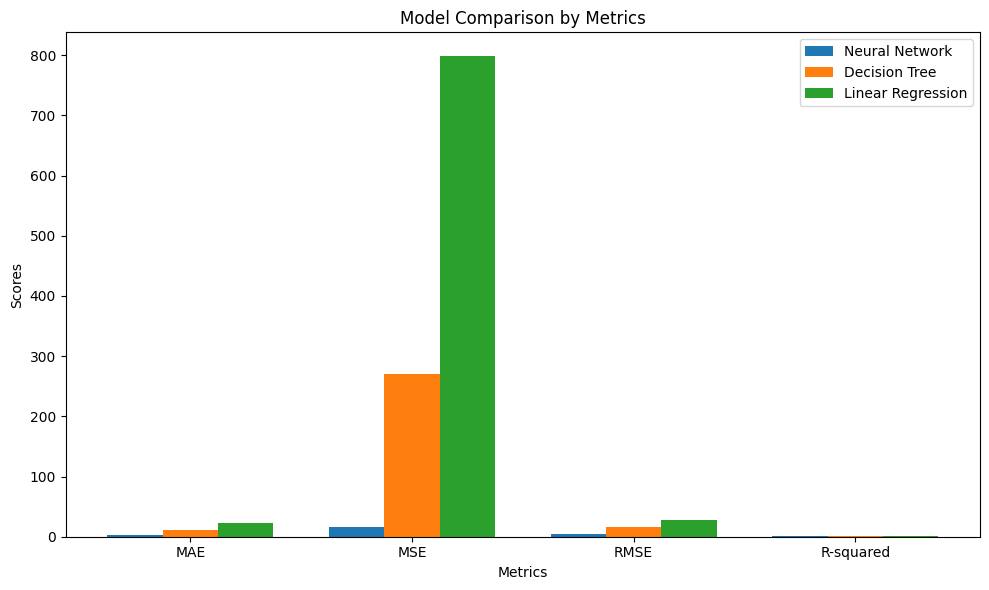

In [245]:
print("\n--- Model Comparison ---")
metrics = ['MAE', 'MSE', 'RMSE', 'R-squared']
nn_values = list(metrics_nn.values())
dt_values = list(metrics_dt.values())
lr_values = list(metrics_lr.values())

x_pos = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x_pos - width, nn_values, width, label='Neural Network')
rects2 = ax.bar(x_pos, dt_values, width, label='Decision Tree')
rects3 = ax.bar(x_pos + width, lr_values, width, label='Linear Regression')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Metrics')
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()